# Pneumonia Detection using CNN

### Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from PIL import Image


mainDIR = os.listdir('C:\\Users\\harsh\\OneDrive\\Desktop\chest_xray\chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


### 

In [2]:
train_folder = "C:\\Users\\harsh\\OneDrive\\Desktop\chest_xray\chest_xray\\train" 
test_folder = "C:\\Users\\harsh\\OneDrive\\Desktop\chest_xray\chest_xray\\test" 
val_folder = "C:\\Users\\harsh\\OneDrive\\Desktop\chest_xray\chest_xray\\val" 

### Setting up training and testing folders

In [3]:
os.listdir(train_folder)
train_n = train_folder + '\\NORMAL\\'
train_p = train_folder + '\\PNEUMONIA\\'

### Taking a look at pictures

In [4]:
# NORMAL PICTURES

print(len(os.listdir(train_n)))
normal_index = np.random.randint(0,len(os.listdir(train_n)))
normal_pic = os.listdir(train_n)[normal_index]
print(f'Normal Picture Title: {normal_pic}')

#PNEUOMNIA PICTURES

print(len(os.listdir(train_p)))
pneumonia_index = np.random.randint(0,len(os.listdir(train_p)))
pneumonia_pic = os.listdir(train_p)[pneumonia_index]
print(f"Pneumonia Picture Title {pneumonia_pic}")

np_address = train_n + normal_pic
pp_address = train_p + pneumonia_pic

1342
Normal Picture Title: IM-0389-0001.jpeg
3876
Pneumonia Picture Title person470_bacteria_2003.jpeg


### Plotting

Text(0.5, 1.0, 'PNEUMONIA')

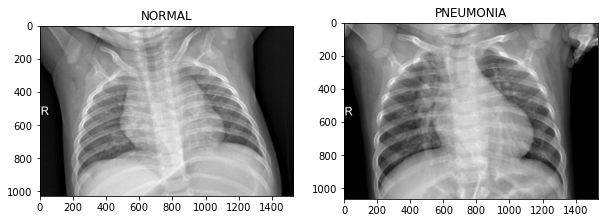

In [15]:
import matplotlib.pyplot as plt

load_np = Image.open(np_address)
load_pp = Image.open(pp_address)

figure = plt.figure(figsize = (10,8))
normal = figure.add_subplot(1,2,1)
normal_plot = plt.imshow(load_np, cmap='gray')
normal.set_title('NORMAL')

pneumonia = figure.add_subplot(1,2,2)
pneumonia_plot = plt.imshow(load_pp,cmap='gray')
pneumonia.set_title('PNEUMONIA')

In [6]:

from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator (
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
)

testing_datagen = ImageDataGenerator ( rescale = 1./255 )

train_generator = training_datagen.flow_from_directory(
    "C:\\Users\\harsh\\OneDrive\\Desktop\chest_xray\chest_xray\\train" ,
    target_size= (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = testing_datagen.flow_from_directory(
        "C:\\Users\\harsh\\OneDrive\\Desktop\chest_xray\chest_xray\\test" ,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = testing_datagen.flow_from_directory (
    "C:\\Users\\harsh\\OneDrive\\Desktop\chest_xray\chest_xray\\val" ,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Building CNN

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense

cnn = Sequential()

cnn.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu' , input_shape = (64,64,3)))
cnn.add(MaxPooling2D(pool_size = 2))

cnn.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu' ))
cnn.add(MaxPooling2D(pool_size = 2))

cnn.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu' ))
cnn.add(MaxPooling2D(pool_size = 2))

cnn.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu' ))
cnn.add(MaxPooling2D(pool_size = 2 ))
cnn.add(Flatten())

cnn.add(Dense(units = 259, activation = 'relu'))
cnn.add(Dense(units = 1,activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [9]:
history = cnn.fit(train_generator , validation_data = validation_generator, epochs=12)

Epoch 1/12
163/163 [==============================] - 116s 701ms/step - loss: 0.4769 - accuracy: 0.7876 - val_loss: 0.6521 - val_accuracy: 0.8125
Epoch 2/12
163/163 [==============================] - 124s 765ms/step - loss: 0.2503 - accuracy: 0.8976 - val_loss: 0.9208 - val_accuracy: 0.6250
Epoch 3/12
163/163 [==============================] - 116s 711ms/step - loss: 0.1888 - accuracy: 0.9241 - val_loss: 0.7408 - val_accuracy: 0.6875
Epoch 4/12
163/163 [==============================] - 103s 635ms/step - loss: 0.1601 - accuracy: 0.9396 - val_loss: 0.5900 - val_accuracy: 0.6875
Epoch 5/12
163/163 [==============================] - 102s 627ms/step - loss: 0.1566 - accuracy: 0.9394 - val_loss: 0.4040 - val_accuracy: 0.8125
Epoch 6/12
163/163 [==============================] - 95s 585ms/step - loss: 0.1490 - accuracy: 0.9411 - val_loss: 1.0736 - val_accuracy: 0.5625
Epoch 7/12
163/163 [==============================] - 109s 672ms/step - loss: 0.1514 - accuracy: 0.9436 - val_loss: 1.0867 - 

In [10]:
test_accu = cnn.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 [==============================] - 11s 556ms/step - loss: 0.2552 - accuracy: 0.9263
The testing accuracy is : 92.62820482254028 %


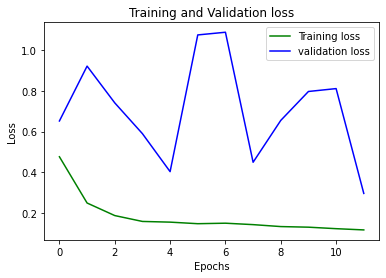

In [13]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,12)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

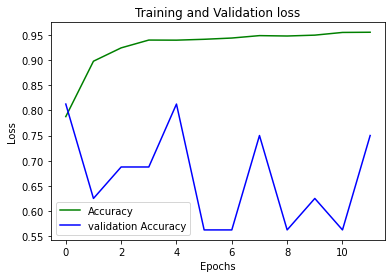

In [14]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,12)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()